In [81]:
# 色々準備
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info.operators import Operator
%config InlineBackend.figure_format = 'svg' # Jupyterノートブックの場合
from math import sqrt

# 1.1 Xゲート

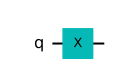

In [7]:
# |0> 量子ビットに対してゲート作用させてみましょう。
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


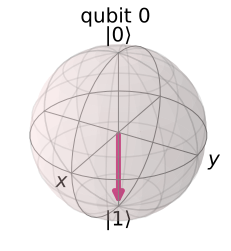

In [8]:
# 結果を見てみましょう
# 注意 ここでは、ブロッホベクトルの代わりに量子ビットの状態ベクトルを取る plot_bloch_multivector()を使用しています。
backend = Aer.get_backend('statevector_simulator')
out = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out)

# 1.2 Y、Zゲート

In [9]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

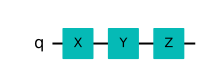

In [10]:
qc.y(0) # 量子ビット0にYゲートを適用します。
qc.z(0) # 量子ビット0にZゲートを適用します。
qc.draw('mpl')

# 3. アダマールゲート 

In [1]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

# 練習問題

(1) H = |+><0| + |-><1|

(2) HZHを計算したらわかる

(3) Y=iXZ

# 4. 余談: 異なる基底での測定

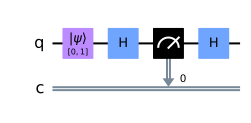

In [4]:
from qiskit.extensions import Initialize # Inititialize機能をインポートします。

"""X基底で測定を行う
X基底で測定するにはアダマールゲートを使用して独自に作成する必要がある
"""

def x_measurement(qc,qubit,cbit):
    """X測定関数を作成する
    Measure 'qubit' in the X-basis, and store the result in 'cbit'
    
    以前2つのHゲートの間にZゲートを挟むことでXゲートを作成できることを確認しました。

    X = HZH
 
    ここでは、2つのHゲートの間にZ測定を挟んでX測定を作成しています（そうなん？）。
    """
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

""" 量子ビットを初期化して測定する """
# 1qbit, 1cbitの回路を作成
qc = QuantumCircuit(1, 1)

# 初期状態を定義する
initial_state = [0,1]

# 量子状態を初期化する
initialize_qubit = Initialize(initial_state)

# 回路に追加する
qc.append(initialize_qubit, [0])

# X基底で測定する
x_measurement(qc, 0, 0)

# 回路を描く
qc.draw()

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


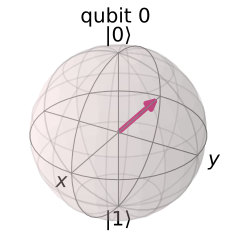

In [5]:
"""X基底で測定できているか、確認する
2つのHゲートの間にZゲートを挟むことでXゲートを作成できる。

X=HZH
 
ここでは、2つのHゲートの間にZ測定を挟んでX測定を作成している。 それでは、結果を見てみよう。

|1⟩ の状態で量子ビットを初期化したが、測定後、量子ビットが |+⟩ または|−⟩ の状態に飛び移ることがわかる。 セルを再度実行すると、異なる結果が表示されるが、量子ビットの最終状態は常に |+⟩ または |−⟩ になる。
"""
backend = Aer.get_backend('statevector_simulator') # Qiskitに回路のシミュレーション方法を伝えます。
out_state = execute(qc,backend).result().get_statevector() # シミュレーションを行い、状態ベクトルを返します。
plot_bloch_multivector(out_state) # 出力状態ベクトルを表示する

# 練習問題

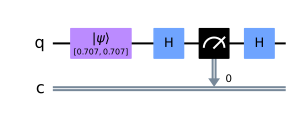

In [15]:
"""練習問題(1)
|+⟩ 状態で量子ビットを初期化する場合、 |−⟩ 状態でそれを測定する確率はどれくらいですか？
"""

def x_measurement(qc,qubit,cbit):
    """X測定関数を作成する
    Measure 'qubit' in the X-basis, and store the result in 'cbit'
    
    以前2つのHゲートの間にZゲートを挟むことでXゲートを作成できることを確認しました。

    X = HZH
 
    ここでは、2つのHゲートの間にZ測定を挟んでX測定を作成しています（そうなん？）。
    """
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

""" 量子ビットを初期化して測定する """
# 1qbit, 1cbitの回路を作成
qc = QuantumCircuit(1, 1)

# |+>状態で初期化する
initial_state = [sqrt(1/2),sqrt(1/2)]

# 量子状態を初期化する
initialize_qubit = Initialize(initial_state)

# 回路に追加する
qc.append(initialize_qubit, [0])

# X基底で測定する
x_measurement(qc, 0, 0)

# 回路を描く
qc.draw()

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


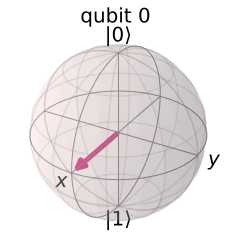

In [23]:
# 測定する
# 答え：何回やっても|+>状態になるので、|->状態で測定する確率は0かな？
# 初期状態を|0>状態にして、Z基底で測定したら100%の確率で|0>を測定するようなものだと思う。
backend = Aer.get_backend('statevector_simulator') # Qiskitに回路のシミュレーション方法を伝えます。
out_state = execute(qc,backend).result().get_statevector() # シミュレーションを行い、状態ベクトルを返します。
plot_bloch_multivector(out_state) # 出力状態ベクトルを表示する

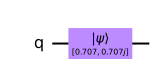

In [78]:
"""練習問題(2)
Qiskitを使用して、 |+⟩ と |−⟩ の状態で |0⟩ 量子ビットを測定する確率を表示してください。（ヒント： .get_counts()および plot_histogram()を使用することができます。)
これあってるのか微妙。
"""
# 1qbit, 1cbitの回路を作成
qc = QuantumCircuit(1)

# |+>状態で初期化する(|+> = 1/√2|0> + i/√2|1> の重ね合わせ状態)
initial_state = [1/sqrt(2), complex(0, 1/sqrt(2))]

# 量子状態を初期化する
initialize_qubit = Initialize(initial_state)

# # 回路に追加する
qc.append(initialize_qubit, [0])

# Z基底で測定するので、そのまま測定する...と思ったが、測定したら状態が確定するので、これはしない
# qc.measure(0, 0)

# 回路を描く
qc.draw()

[0.70710678+0.j         0.        +0.70710678j]
{'0': 0.5, '1': 0.5}


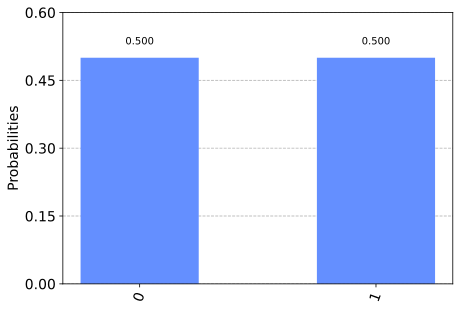

In [79]:
# 回路を実行する
state = execute(qc, backend).result().get_statevector()
print(state)

# .get_counts()を使用して、0と1の結果のカウントを取得する
counts = execute(qc, backend).result().get_counts()
print(counts)

# ヒストグラムで表示
plot_histogram(counts)

In [82]:
"""練習問題(3)
Y基底で測定する関数を作成してみてください。
"""
def y_measurement(qc,qubit,cbit):
    """Y測定関数を作成する
    Measure 'qubit' in the X-basis, and store the result in 'cbit'
    
    Y = iXZ
 
    なので、iXゲートの間にZ測定を挟んでY測定を作成しています（たぶん）。

    「ユニタリじゃないからだめ」って言われたゾ…
    """
    iX = Operator([[0, complex(0, 1)], [0, complex(0, 1)]])
    qc.append(iX, qubit)
    qc.measure(qubit, cbit)
    return qc

""" 量子ビットを初期化して測定する """
# 1qbit, 1cbitの回路を作成
qc = QuantumCircuit(1, 1)

# |+>状態で初期化する
initial_state = [sqrt(1/2),sqrt(1/2)]

# 量子状態を初期化する
initialize_qubit = Initialize(initial_state)

# 回路に追加する
qc.append(initialize_qubit, [0])

# Y基底で測定する
y_measurement(qc, 0, 0)


ExtensionError: 'Input matrix is not unitary.'

# 5. Rϕゲート

In [84]:
"""Rzゲートを体感する
* 3.14(pi)にしてRzボタンをクリックすると、Z軸中心に180度回転する
* 1.57(pi/2)にしてRzボタンをクリックすると、Z軸中心に90度回転する
"""
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+rz')

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

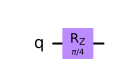

In [85]:
"""Qiskitでは、rz(phi,qubit)を使用してRϕゲートを指定します。"""
qc = QuantumCircuit(1)
qc.rz(pi/4, 0)
qc.draw('mpl')

# 練習問題

In [ ]:
(1) Iゲートの固有状態は？
固有値λは1
任意のベクトルが固有ベクトルになる

# 6.2 Sゲート

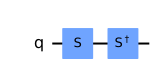

In [86]:
"""Sゲートと、Sdgゲート"""
qc = QuantumCircuit(1)
qc.s(0)   # Sゲートを量子ビット0に適用します。
qc.sdg(0) # Sdgゲートを量子ビット0に適用します。
qc.draw('mpl')

# 6.3 Tゲート

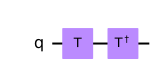

In [87]:
"""Tゲート"""
qc = QuantumCircuit(1)
qc.t(0)   # Tゲートを量子ビット0に適用します。
qc.tdg(0) # Tdgゲートを量子ビット0に適用します。
qc.draw('mpl')

In [88]:
"""以下のウィジェットを使用して、これまでのすべてのゲートを試すことができる"""
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo()

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…